# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

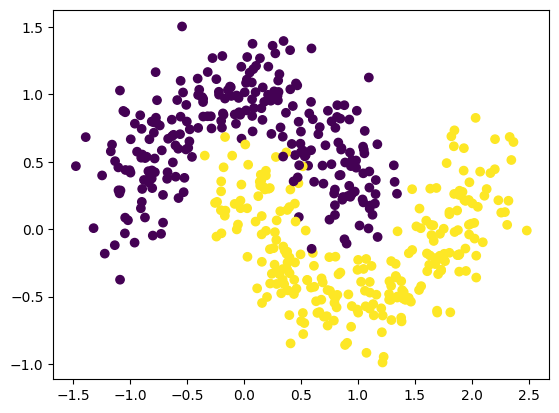

In [4]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too

### YOUR CODE HERE

Logistic Regression Accuracy: 0.856


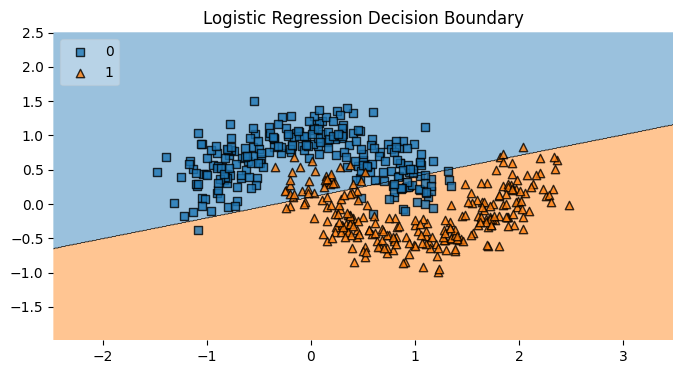

Linear SVM Accuracy: 0.858


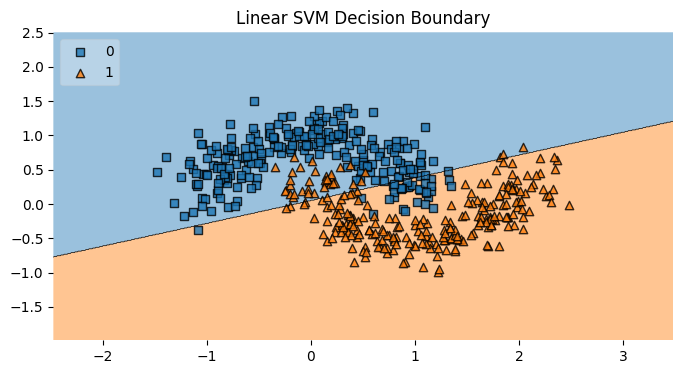

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Генерация датасета Moons
from sklearn.datasets import make_moons
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

# Логистическая регрессия
lr = LogisticRegression()
lr.fit(moons_points, moons_labels)
print("Logistic Regression Accuracy:", accuracy_score(moons_labels, lr.predict(moons_points)))

# Визуализация областей решений
plt.figure(figsize=(8, 4))
plot_decision_regions(moons_points, moons_labels, clf=lr, legend=2)
plt.title("Logistic Regression Decision Boundary")
plt.show()

# SVM с линейным ядром
svm_linear = SVC(kernel='linear')
svm_linear.fit(moons_points, moons_labels)
print("Linear SVM Accuracy:", accuracy_score(moons_labels, svm_linear.predict(moons_points)))

# Визуализация областей решений
plt.figure(figsize=(8, 4))
plot_decision_regions(moons_points, moons_labels, clf=svm_linear, legend=2)
plt.title("Linear SVM Decision Boundary")
plt.show()


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Polynomial Kernel SVM Accuracy: 0.906


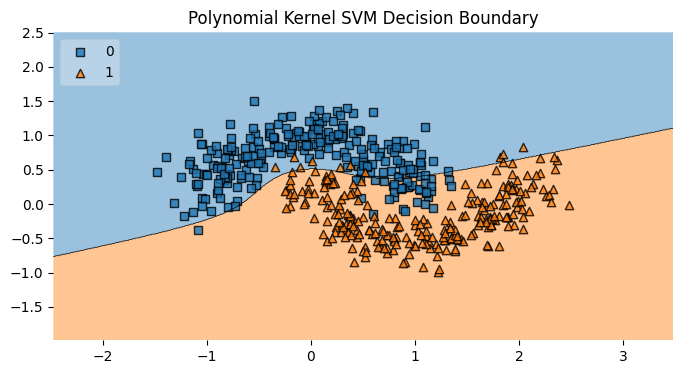

RBF Kernel SVM Accuracy: 0.974


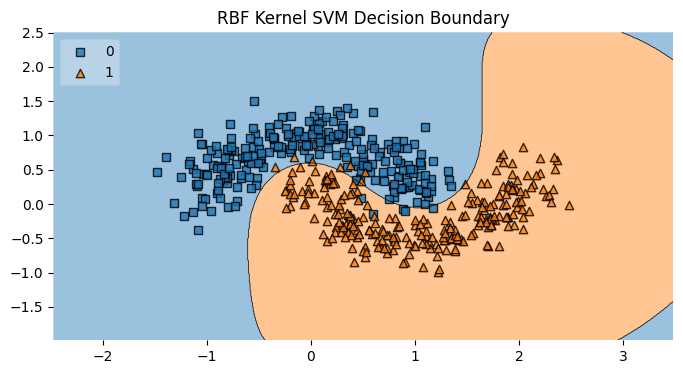

Sigmoid Kernel SVM Accuracy: 0.648


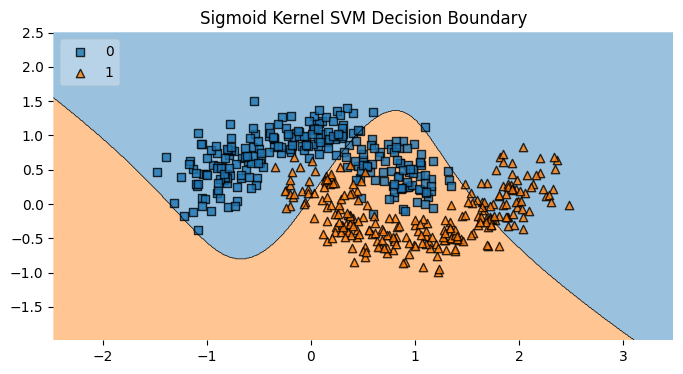

In [7]:
### YOUR CODE HERE
# SVM с полиномиальным ядром
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(moons_points, moons_labels)
print("Polynomial Kernel SVM Accuracy:", accuracy_score(moons_labels, svm_poly.predict(moons_points)))

plt.figure(figsize=(8, 4))
plot_decision_regions(moons_points, moons_labels, clf=svm_poly, legend=2)
plt.title("Polynomial Kernel SVM Decision Boundary")
plt.show()

# SVM с RBF ядром
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(moons_points, moons_labels)
print("RBF Kernel SVM Accuracy:", accuracy_score(moons_labels, svm_rbf.predict(moons_points)))

plt.figure(figsize=(8, 4))
plot_decision_regions(moons_points, moons_labels, clf=svm_rbf, legend=2)
plt.title("RBF Kernel SVM Decision Boundary")
plt.show()

# SVM с сигмоидным ядром
svm_sigmoid = SVC(kernel='sigmoid', C=1)
svm_sigmoid.fit(moons_points, moons_labels)
print("Sigmoid Kernel SVM Accuracy:", accuracy_score(moons_labels, svm_sigmoid.predict(moons_points)))

plt.figure(figsize=(8, 4))
plot_decision_regions(moons_points, moons_labels, clf=svm_sigmoid, legend=2)
plt.title("Sigmoid Kernel SVM Decision Boundary")
plt.show()


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Polynomial Features Logistic Regression Accuracy: 0.968


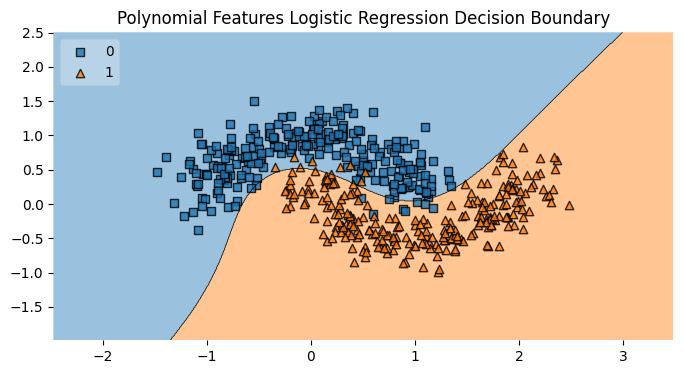

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Создаем pipeline для Логистической регрессии с полиномиальными признаками
poly_log_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),  # Adjust degree as needed
    ("log_reg", LogisticRegression())
])

poly_log_reg.fit(moons_points, moons_labels)
print("Polynomial Features Logistic Regression Accuracy:", accuracy_score(moons_labels, poly_log_reg.predict(moons_points)))

plt.figure(figsize=(8, 4))
plot_decision_regions(moons_points, moons_labels, clf=poly_log_reg, legend=2)
plt.title("Polynomial Features Logistic Regression Decision Boundary")
plt.show()


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

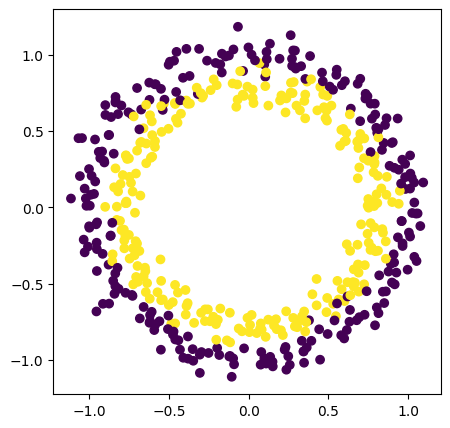

In [9]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

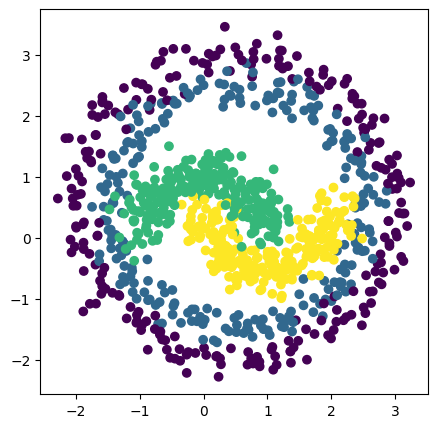

In [10]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [11]:
### YOUR CODE HERE

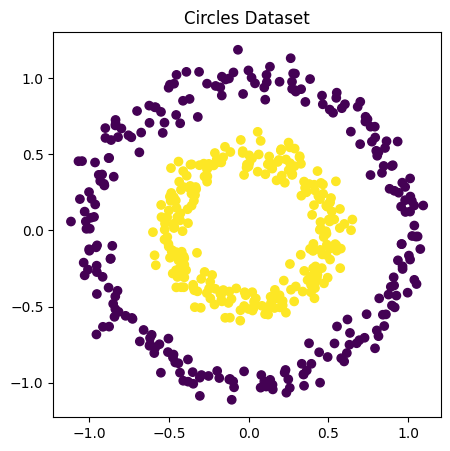

In [12]:
from sklearn.datasets import make_circles

# Генерация датасета Circles
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42, factor=0.5)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels, cmap='viridis')
plt.title("Circles Dataset")
plt.show()


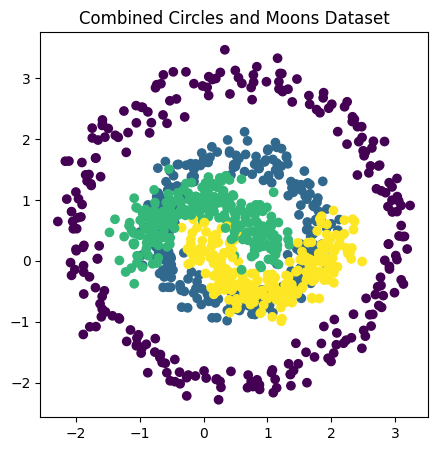

RBF Kernel SVM Accuracy on Combined Dataset: 0.846


c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


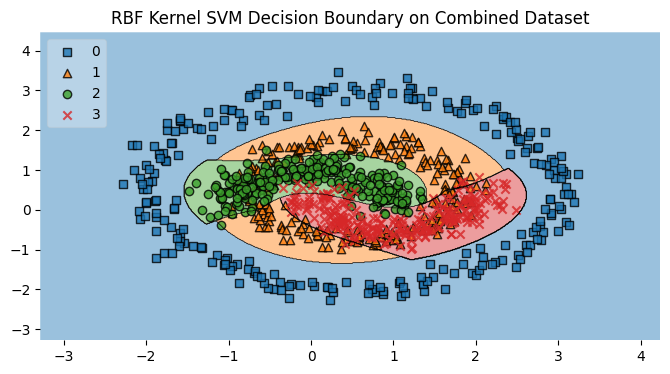

In [13]:
import numpy as np

# Объединение датасетов
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # +2 для различных классов

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
plt.title("Combined Circles and Moons Dataset")
plt.show()

# Применение SVM и логистической регрессии на объединенном наборе данных
svm_rbf_combined = SVC(kernel='rbf', C=1)
svm_rbf_combined.fit(points, labels)
print("RBF Kernel SVM Accuracy on Combined Dataset:", accuracy_score(labels, svm_rbf_combined.predict(points)))

plt.figure(figsize=(8, 4))
plot_decision_regions(points, labels, clf=svm_rbf_combined, legend=2)
plt.title("RBF Kernel SVM Decision Boundary on Combined Dataset")
plt.show()
